**Based Model**

In [1]:
# ===============================
# 1. Imports
# ===============================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [2]:
# ===============================
# 2. Load dataset
# ===============================
csv_path = "/content/sample_data/data_model_preprocessing-PBA.csv"
df = pd.read_csv(csv_path)

target_col = "Late_delivery_risk"

X = df.drop(columns=[target_col])
y = df[target_col]

In [3]:
# ===============================
# 3. Feature types
# ===============================
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

In [4]:
# ===============================
# 4. Train/Test split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [5]:
# ===============================
# 5. Preprocessing
# ===============================
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [6]:
# ===============================
# 6. Logistic Regression model
# ===============================
logreg = LogisticRegression(
    max_iter=1000,
    solver="liblinear",
    random_state=42
)

logreg_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("logreg", logreg)
])

In [7]:
# ===============================
# 7. Train model
# ===============================
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['WeekendOrder',
                                                   'Processing.Days',
                                                   'Distance_km',
                                                   '`Order Item Product Price`',
                                                   '`Order Item Quantity`',
                                                   '`Order Item Discount Rate`',
                                                   '`Order Region`Caribbean',
                                                   '`Order Region`Central '
                                                   'Africa',
                                                   '`Order Region`Central '
                                                   'America',
                                                   '`Order Region`East Africa'...
                                                   '`Order Region`West Asia',
                                                   '`Order Region`West of USA',
                                                   '`Order Region`Western '
                                                   'Europe',
                                                   '`Shipping Mode`Same Day',
                                                   '`Shipping Mode`Second '
                                                   'Class',
                                                   '`Shipping Mode`Standard '
                                                   'Class']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])])),
                ('logreg',
                 LogisticRegression(max_iter=1000, random_state=42,
                                    solver='liblinear'))])

In [8]:
# ===============================
# 8. Predictions and Evaluation
# ===============================
y_pred_lr = logreg_pipeline.predict(X_test)
y_proba_lr = logreg_pipeline.predict_proba(X_test)[:, 1]

acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, zero_division=0)
rec_lr = recall_score(y_test, y_pred_lr, zero_division=0)
f1_lr = f1_score(y_test, y_pred_lr, zero_division=0)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

print("\n=== Logistic Regression (Baseline) Performance ===")
print(f"Accuracy     : {acc_lr:.4f}")
print(f"Precision    : {prec_lr:.4f}")
print(f"Recall       : {rec_lr:.4f}")
print(f"F1-score     : {f1_lr:.4f}")
print(f"ROC-AUC      : {roc_auc_lr:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, digits=4))



=== Logistic Regression (Baseline) Performance ===
Accuracy     : 0.9506
Precision    : 0.9566
Recall       : 0.9532
F1-score     : 0.9549
ROC-AUC      : 0.9728

Confusion Matrix:
[[10483   581]
 [  630 12818]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9433    0.9475    0.9454     11064
           1     0.9566    0.9532    0.9549     13448

    accuracy                         0.9506     24512
   macro avg     0.9500    0.9503    0.9501     24512
weighted avg     0.9506    0.9506    0.9506     24512



**SVM**

In [9]:
# ===============================
# 1. Imports
# ===============================
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [10]:
# ===============================
# 2. Load preprocessed dataset
# ===============================

csv_path = "/content/sample_data/data_model_preprocessing-PBA.csv"
df = pd.read_csv(csv_path)

print("Shape of dataset:", df.shape)
print("First 5 rows:")
display(df.head())

Shape of dataset: (122557, 31)
First 5 rows:


,WeekendOrder,Processing.Days,Distance_km,`Order Item Product Price`,`Order Item Quantity`,`Order Item Discount Rate`,`Order Region`Caribbean,`Order Region`Central Africa,`Order Region`Central America,`Order Region`East Africa,...,`Order Region`Southern Europe,`Order Region`US Center,`Order Region`West Africa,`Order Region`West Asia,`Order Region`West of USA,`Order Region`Western Europe,`Shipping Mode`Same Day,`Shipping Mode`Second Class,`Shipping Mode`Standard Class,Late_delivery_risk
0,0,3.0,18500.760815,327.75,1,0.04,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,3.0,11640.755465,327.75,1,0.07,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,2.0,16576.993966,327.75,1,0.09,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6.0,15192.036863,327.75,1,0.10,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,2.0,15431.281031,327.75,1,0.12,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
# ===============================
# 3. Define target and features
# ===============================

target_col = "Late_delivery_risk"

if target_col not in df.columns:
    raise ValueError(f"Target column '{target_col}' not found. "
                     f"Available columns: {list(df.columns)}")

X = df.drop(columns=[target_col])
y = df[target_col]

print("\nTarget distribution:")
print(y.value_counts(normalize=True))


Target distribution:
Late_delivery_risk
1    0.54861
0    0.45139
Name: proportion, dtype: float64


In [12]:
# ===============================
# 4. Identify numeric and categorical features
# ===============================
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("\nNumeric features:", numeric_features)
print("Categorical features:", categorical_features)

# ===============================
# 5. Train/Test split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nTrain shape:", X_train.shape)
print("Test shape:", X_test.shape)


Numeric features: ['WeekendOrder', 'Processing.Days', 'Distance_km', '`Order Item Product Price`', '`Order Item Quantity`', '`Order Item Discount Rate`', '`Order Region`Caribbean', '`Order Region`Central Africa', '`Order Region`Central America', '`Order Region`East Africa', '`Order Region`East of USA', '`Order Region`Eastern Asia', '`Order Region`Eastern Europe', '`Order Region`North Africa', '`Order Region`Northern Europe', '`Order Region`Oceania', '`Order Region`South America', '`Order Region`South Asia', '`Order Region`South of  USA', '`Order Region`Southeast Asia', '`Order Region`Southern Africa', '`Order Region`Southern Europe', '`Order Region`US Center', '`Order Region`West Africa', '`Order Region`West Asia', '`Order Region`West of USA', '`Order Region`Western Europe', '`Shipping Mode`Same Day', '`Shipping Mode`Second Class', '`Shipping Mode`Standard Class']
Categorical features: []

Train shape: (98045, 30)
Test shape: (24512, 30)


In [13]:
# ===============================
# 6. Preprocessing + SVM Pipeline
# ===============================

# Preprocess numeric: StandardScaler
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Preprocess categorical: OneHotEncoder
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Define SVM model
svm_clf = SVC(
    kernel="rbf",
    C=1.0,
    gamma="scale",
    probability=True,
    random_state=42
)

# Build full pipeline: preprocessing and model
svm_pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("svm", svm_clf)
])

In [14]:
# ===============================
# 7. Train the SVM model
# ===============================
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['WeekendOrder',
                                                   'Processing.Days',
                                                   'Distance_km',
                                                   '`Order Item Product Price`',
                                                   '`Order Item Quantity`',
                                                   '`Order Item Discount Rate`',
                                                   '`Order Region`Caribbean',
                                                   '`Order Region`Central '
                                                   'Africa',
                                                   '`Order Region`Central '
                                                   'America',
                                                   '`Order Region`East Africa'...
                                                   '`Order Region`US Center',
                                                   '`Order Region`West Africa',
                                                   '`Order Region`West Asia',
                                                   '`Order Region`West of USA',
                                                   '`Order Region`Western '
                                                   'Europe',
                                                   '`Shipping Mode`Same Day',
                                                   '`Shipping Mode`Second '
                                                   'Class',
                                                   '`Shipping Mode`Standard '
                                                   'Class']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  [])])),
                ('svm', SVC(probability=True, random_state=42))])

In [15]:
# ===============================
# 8. Predictions and metrics
# ===============================
y_pred = svm_pipeline.predict(X_test)
y_proba = svm_pipeline.predict_proba(X_test)[:, 1]  # probability for class 1

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_proba)

print("\n=== SVM Performance on Test Set ===")
print(f"Accuracy     : {acc:.4f}")
print(f"Precision    : {prec:.4f}")
print(f"Recall       : {rec:.4f}")
print(f"F1-score     : {f1:.4f}")
print(f"ROC-AUC      : {roc_auc:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))



=== SVM Performance on Test Set ===
Accuracy     : 0.9526
Precision    : 0.9492
Recall       : 0.9653
F1-score     : 0.9572
ROC-AUC      : 0.9714

Confusion Matrix:
[[10369   695]
 [  466 12982]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9570    0.9372    0.9470     11064
           1     0.9492    0.9653    0.9572     13448

    accuracy                         0.9526     24512
   macro avg     0.9531    0.9513    0.9521     24512
weighted avg     0.9527    0.9526    0.9526     24512



In [17]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import (
    roc_curve, auc,
    precision_recall_curve, average_precision_score,
    confusion_matrix,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

# ===============================
# 1) Get predictions/probabilities
# ===============================
# Baseline: Logistic Regression
y_pred_lr = logreg_pipeline.predict(X_test)
y_proba_lr = logreg_pipeline.predict_proba(X_test)[:, 1]

# SVM
y_pred_svm = svm_pipeline.predict(X_test)
y_proba_svm = svm_pipeline.predict_proba(X_test)[:, 1]

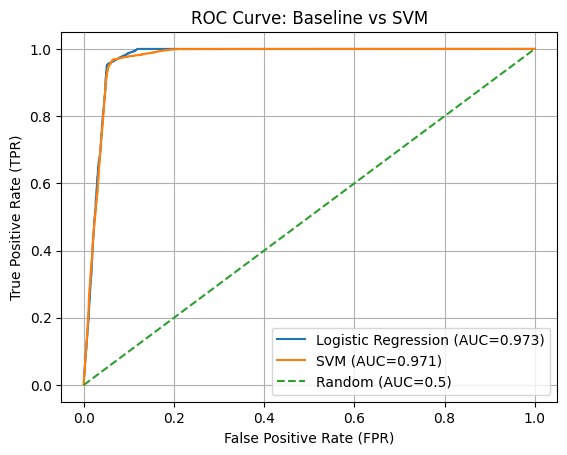

In [18]:
# ===============================
# 2) ROC Curve for both models
# ===============================
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC={roc_auc_lr:.3f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC={roc_auc_svm:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random (AUC=0.5)")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve: Baseline vs SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

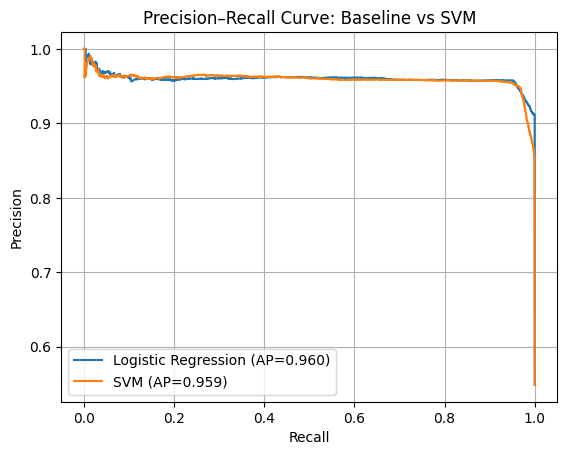

In [19]:
# ===============================
# 3) Precision–Recall Curve for both models
# ===============================
prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_proba_lr)
ap_lr = average_precision_score(y_test, y_proba_lr)

prec_svm, rec_svm, _ = precision_recall_curve(y_test, y_proba_svm)
ap_svm = average_precision_score(y_test, y_proba_svm)

plt.figure()
plt.plot(rec_lr, prec_lr, label=f"Logistic Regression (AP={ap_lr:.3f})")
plt.plot(rec_svm, prec_svm, label=f"SVM (AP={ap_svm:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve: Baseline vs SVM")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

/tmp/ipython-input-273238696.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


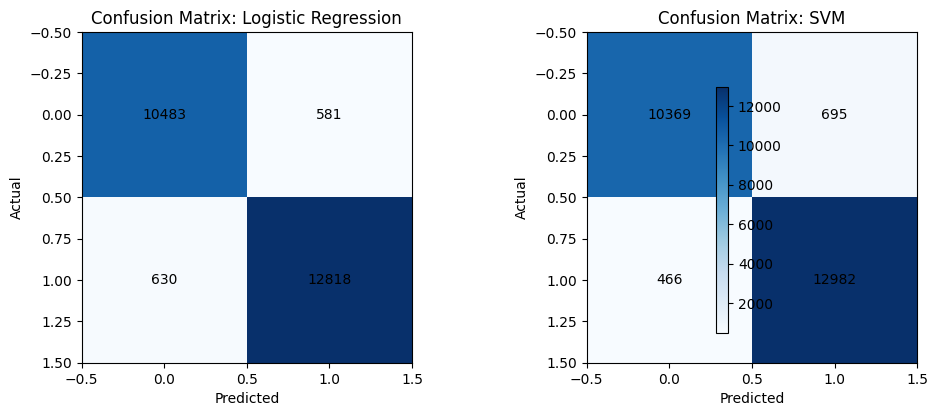

In [24]:
# ===============================
# 4) Confusion Matrices (side-by-side)
# ===============================
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svm = confusion_matrix(y_test, y_pred_svm)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Logistic Regression
im1 = axes[0].imshow(cm_lr, cmap="Blues")
axes[0].set_title("Confusion Matrix: Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
for (i, j), v in np.ndenumerate(cm_lr):
    axes[0].text(j, i, str(v), ha="center", va="center")

# SVM
im2 = axes[1].imshow(cm_svm, cmap="Blues")
axes[1].set_title("Confusion Matrix: SVM")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
for (i, j), v in np.ndenumerate(cm_svm):
    axes[1].text(j, i, str(v), ha="center", va="center")

# Add colorbar (shared)
fig.colorbar(im2, ax=axes.ravel().tolist(), shrink=0.8)

plt.tight_layout()
plt.show()


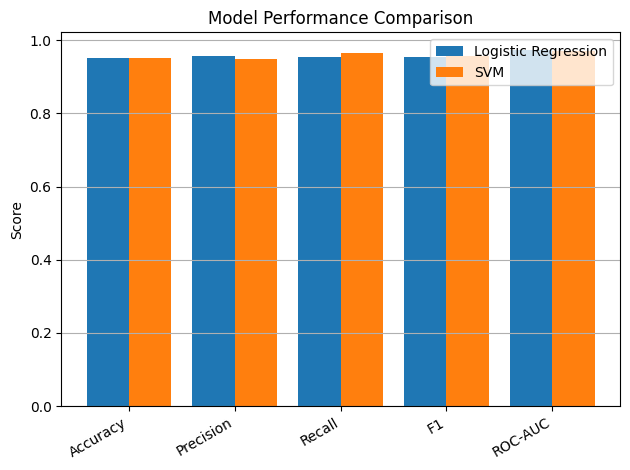

=== Metrics Summary ===
Logistic Regression: {'Accuracy': 0.9506, 'Precision': 0.9566, 'Recall': 0.9532, 'F1': 0.9549, 'ROC-AUC': np.float64(0.9728)}
SVM: {'Accuracy': 0.9526, 'Precision': 0.9492, 'Recall': 0.9653, 'F1': 0.9572, 'ROC-AUC': np.float64(0.9714)}


In [25]:
# ===============================
# 5) Metric comparison bar chart
# ===============================
def metrics(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_true, y_proba)
    }

m_lr = metrics(y_test, y_pred_lr, y_proba_lr)
m_svm = metrics(y_test, y_pred_svm, y_proba_svm)

labels = list(m_lr.keys())
x = np.arange(len(labels))

plt.figure()
plt.bar(x - 0.2, [m_lr[k] for k in labels], width=0.4, label="Logistic Regression")
plt.bar(x + 0.2, [m_svm[k] for k in labels], width=0.4, label="SVM")
plt.xticks(x, labels, rotation=30, ha="right")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

# Print metrics
print("=== Metrics Summary ===")
print("Logistic Regression:", {k: round(v, 4) for k, v in m_lr.items()})
print("SVM:", {k: round(v, 4) for k, v in m_svm.items()})
